In [4]:
from torch_geometric.datasets import TUDataset
import torch_geometric.transforms as T
import torch
from torch_geometric.loader import DataLoader

In [5]:


dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)

print(f'Dataset: {dataset}:')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


Dataset: ENZYMES(600):
Number of graphs: 600
Number of features: 21
Number of classes: 6


In [6]:
train_size = int(0.8 * len(dataset))
test_size = (len(dataset) - train_size) / 2
val_size = int(test_size)

train_size

480

In [7]:
torch.manual_seed(10)


In [ ]:
indices = torch.randperm(len(dataset)).tolist()
train_dataset = [dataset[i] for i in indices[:train_size]]

val_index = train_size + val_size

val_dataset = [dataset[i] for i in indices[train_size:val_index]]

test_dataset = [dataset[i] for i in indices[val_index:]]


In [31]:
print(f"Train Size: {len(train_dataset)}")
print(f"Validation Size: {len(val_dataset)}")
print(f"Test Size: {len(test_dataset)}")

Train Size: 480
Validation Size: 60
Test Size: 60


In [32]:
class_distribution = {}

for g in train_dataset:
    c = int(g.y[0])

    if c not in class_distribution:
        class_distribution[c] = 1

    else:
        class_distribution[c] += 1

In [33]:
class_distribution

{4: 78, 3: 73, 5: 84, 1: 84, 0: 79, 2: 82}

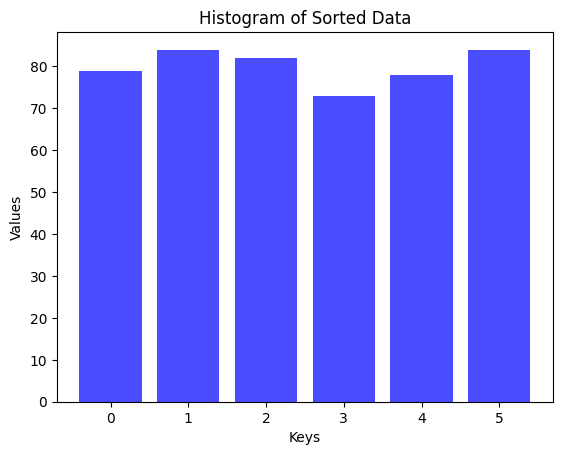

In [34]:
import matplotlib.pyplot as plt

class_distribution = dict(sorted(class_distribution.items()))

plt.bar(class_distribution.keys(), class_distribution.values(), color='blue', alpha=0.7)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Histogram of Sorted Data')
plt.show()


Classes are balanced within training data graphs

In [ ]:
val_dataset[1].y

Data(edge_index=[2, 152], x=[42, 21], y=[1])